In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import seaborn as sns

from __future__ import division
pd.set_option('display.width',5000)

In [5]:
path = 'path'    #specify the path

In [6]:
# import using pandas
df=pd.read_csv(path)
df.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
df.age=df.age.fillna(df.age.mean())

In [9]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [152]:
y,X=dmatrices('survived~ pclass +age+sibsp+parch+fare',data=df,return_type='dataframe')

In [165]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print "Training Data Accuracy: %0.2f" %(train_acc)
    print "Test Data Accuracy:     %0.2f" %(test_acc)
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print conf

    print '\n'
    print "Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0]))
    print "Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.71
Test Data Accuracy:     0.70
[[97 12]
 [42 28]]


Precision:              0.70
Recall:                 0.89


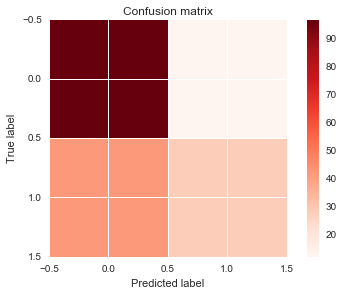

In [166]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)


In [177]:
# What about ROC ? 

def ROC_viz(clf, x,y): 
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = clf.fit(xtrain, ytrain)
    
    print 'fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1]
    print 'tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1]
    
    roc=metrics.roc_curve(ytest,clf.predict(xtest))
    plt.figure()
    # Plotting our Baseline! 
    plt.plot([0,1],[0,1])
    plt.plot(roc[0],roc[1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    

fpr 0.110091743119
tpr 0.4


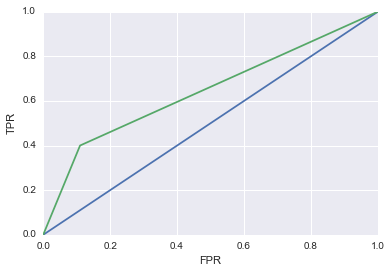

In [178]:
ROC_viz(log_clf,X,y)

####  Cost Benefit and Classification Errors: 

We can also optimize our models based on specific costs associated with our classification errors. 

Let's say we were developing a classification model for Aircraft Delay prediction. 

We have specific costs associated with each type of error: 

cb = np.array([[2160, -750.0], [-2900, 0]])  

Expected_Value = #TPs(2160) - #FNs(2900) -#FPs(1000)  